# Лабораторная работа №6: Кластерный анализ. Метод k-средних

Выполнили студентки гр. 8383 Ишанина Людмила и Сырцова Екатерина. Вариант №6.

## Цель работы

Освоение основных понятий и некоторых методов кластерного анализа, в частности, метода k-means.

## Основные теоретические положения

**Задача кластерного анализа** заключается в том, чтобы на основании данных, характеризующих исследуемые объекты, разбить множество объектов $G$ на $m$ ( $m$ - целое) кластеров (подмножеств $G$) $G_1, G_2, ..., G_m$, таких, что:
$$G_1 \subset G; G_2 \subset G ... G_m \subset G$$
$$G_1 \subset G_2 \subset ... \subset G_m = G$$
$$G_i \cap G_j = \varnothing; \forall i \neq j; i,j = 1, 2, ..., m$$


**Оценка качества многомерной классификации**
Для оценки полученных результатов кластеризации используются так называемые **функционалы качества**. Наилучшим считается такое разбиение, при котором достигается минимальное или максимальное значение выбранного функционала качества.
В качестве таких функционалов могут быть использованы:
+ Сумму квадратов расстояний до центров кластеров
$$F_1 = \sum_{k=1}^K\sum_{i=1}^N_k d^2(X_i^{(k)},\bar{X}^{(k)}) \Rightarrow min$$
+ Сумма внутрикластерных расстояний между объектами
$$F_2 = \sum_{k=1}^K\sum_{X_i,X_j \in S_k} d^2(X_i,X_j) \Rightarrow min$$
+ Сумма внутрикластерных дисперсий
$$F_3 = \sum_{k=1}^K\sum_{j=1}^N_k \sigma_{kj}^2 \Rightarrow min$$

**Алгоритм метода k-средних:**
Пусть имеется $n$ наблюдений, каждое из которых характеризуется $m$ признаками $X_1,X_2,...,X_m$, эти наблюдения необходимо разбить на $k$ кластеров.
1. Из $n$ точек исследуемой совокупности отбираются случайным образом или задаются, исходя из каких-либо априорных соображений, $k$ точек, которые принимаются за эталоны - центры кластеров. Каждому эталону присваивается порядковый номер, который одновременно является и номером кластера.
2. На первом шаге из оставшихся $(n-k)$ объектов извлекается точка $X_i$ с координатами $(x_{i1},x_{i2},...,x_{im})$ и проверяется, к какому из эталонов она находится ближе всего.
3. На следующем шаге выбирают точку $X_{i+1}$ и для нее повторяются все процедуры. Таким образом, через $(n-k)$ шагов все объекты совокупности отнесены к одному из $k$ кластеров, цикл процедуры завершается.
4. Для того чтобы добиться устойчивости все кластеры считаются пустыми с центрами, полученными в конце предыдущего цикла. Цикл повторяется. Работа алгоритма завершается, если новое разбиение совпадает с полученным на предыдущем шаге.


## Постановка задачи

Дано конечное множество из объектов, представленных двумя признаками (в качестве этого множества принимаем исходную двумерную выборку, сформированную ранее в лабораторной работе №4). Выполнить разбиение исходного множества объектов на конечное число подмножеств (кластеров) с использованием метода k-means. Полученные результаты содержательно проинтерпретировать.

### Порядок выполнения работы
1. Нормализовать множество точек из предыдущего раздела, отобразить полученное множество.
2. Определить «грубую» верхнюю оценку количества кластеров: $\bar{k} = \left\lfloor\sqrt{\frac{N}{2}}\right\rfloor$, где $N$ – число точек.
3. Реализовать алгоритм k-means в двух вариантах:
+ пересчет центра кластера осуществляется после каждого изменения его состава;
+ пересчет центра кластера осуществляется лишь после того, как будет завершен просмотр всех данных (шаг процедуры).
4. На каждом шаге процедуры разбиения методом k-means вычислять функционалы качества полученного разбиения:
+ $F_1$ – сумма по всем кластерам квадратов расстояний элементов кластеров до центров соответствующих кластеров;
+ $F_2$ – сумма по всем кластерам внутрикластерных расстояний между элементами кластеров;
+ $F_3$ – сумма по всем кластерам внутрикластерных дисперсий (относительно центров кластеров).
5. Отобразить полученные кластеры, выделить каждый кластер разным цветом, отметить центроиды.
6. Содержательно проинтерпретировать полученные результаты.
7. Дополнительные необязательные задания:
+ Реализовать алгоритмы k-medians и k-medoids. Отобразить полученные кластеры, выделить каждый кластер разным цветом, отметить центроиды. Провести оценку методов, сделать выводы.
+ С помощью метода локтя и/или метода силуэтов выявить для каждого метода оптимальное количество кластеров.
+ Реализовать модификацию k-means++. Объяснить её приемущества. Сравнить с обычным методом k-means.

## Выполнение работы

### Нормализация множества точек
Нормализуем множество точек из предыдущего раздела по формуле $z = \frac{x}{x_{max}}$ и отобразим полученное множество:

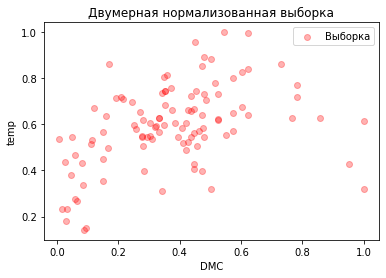

In [161]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import pairwise_distances_argmin
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('forestfires_105.csv', usecols=['DMC', 'temp'], sep=',')

data_DMC = data.loc[:,['DMC']]
ranked_DMC = data_DMC.sort_values(by='DMC')
k = 1 + math.floor(3.322 * math.log10(ranked_DMC.size))
h_DMC = (ranked_DMC['DMC'].max() - ranked_DMC['DMC'].min()) / k
points = np.concatenate((np.arange(ranked_DMC['DMC'].min(), ranked_DMC['DMC'].max(), h_DMC), [ranked_DMC['DMC'].max()]))
interval_DMC = ranked_DMC.groupby(pd.cut(ranked_DMC['DMC'], points)).size().reset_index(name='frequency')
interval_DMC['frequency'][0] += 1
table_DMC = pd.DataFrame()
table_DMC['DMC'] = interval_DMC['DMC']
table_DMC['x_i'] = interval_DMC['DMC'].apply(lambda x: x.mid).astype('float')
table_DMC['n_i'] = interval_DMC['frequency']
center_DMC = table_DMC['x_i'][math.floor(k / 2)]
table_DMC['u_i'] = table_DMC['x_i'].apply(lambda x: (x - center_DMC) / h_DMC)
table_DMC['n_cum'] = np.cumsum(interval_DMC['frequency'])

data_temp = data.loc[:,['temp']]
ranked_temp = data_temp.sort_values(by='temp')
k = 1 + math.floor(3.322 * math.log10(ranked_DMC.size))
h_temp = (ranked_temp['temp'].max() - ranked_temp['temp'].min()) / k
points = np.concatenate((np.arange(ranked_temp['temp'].min(), ranked_temp['temp'].max(), h_temp), [ranked_temp['temp'].max()]))
interval_temp = ranked_temp.groupby(pd.cut(ranked_temp['temp'], points)).size().reset_index(name='frequency')
interval_temp['frequency'][0] += 1
table_temp = pd.DataFrame()
table_temp['temp'] = interval_temp['temp']
table_temp['x_i'] = interval_temp['temp'].apply(lambda x: x.mid).astype('float')
table_temp['n_i'] = interval_temp['frequency']
center_temp = table_temp['x_i'][math.floor(k / 2)]
table_temp['u_i'] = table_temp['x_i'].apply(lambda x: (x - center_temp) / h_temp)
table_temp['n_cum'] = np.cumsum(interval_temp['frequency'])

data_DMC['DMC'] /= max(data_DMC['DMC'])
data_temp['temp'] /= max(data_temp['temp'])

plt.scatter(data_DMC['DMC'], data_temp['temp'], color = 'red', marker = 'o', alpha = 0.3, label = 'Выборка')
plt.xlabel('DMC')
plt.ylabel('temp')
plt.title('Двумерная нормализованная выборка')
plt.legend()
plt.show()

### Определение количества кластеров
Определим «грубую» верхнюю оценку количества кластеров: $\bar{k} = \left\lfloor\sqrt{\frac{N}{2}}\right\rfloor = 7$, где $N$ – число точек.


In [2]:
k = math.floor(math.sqrt(105/2))
k

7

### Реализация и отображение алгоритмов k-means
Реализуем алгоритм k-means в двух вариантах и отобразим полученные кластеры, выделив каждый кластер разным цветом и отметив центроиды. На каждом шаге процедуры разбиения методом k-means вычислим функционалы качества полученного разбиения:
+ Сумму квадратов расстояний до центров кластеров
$$F_1 = \sum_{k=1}^K\sum_{i=1}^N_k d^2(X_i^{(k)},\bar{X}^{(k)}) \Rightarrow min$$
+ Сумма внутрикластерных расстояний между объектами
$$F_2 = \sum_{k=1}^K\sum_{X_i,X_j \in S_k} d^2(X_i,X_j) \Rightarrow min$$
+ Сумма внутрикластерных дисперсий
$$F_3 = \sum_{k=1}^K\sum_{j=1}^N_k \sigma_{kj}^2 \Rightarrow min$$

#### Алгоритм k-means с пересчетом центра кластера после каждого изменения его состава

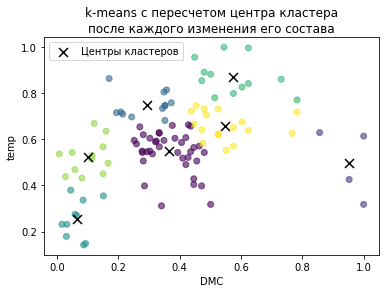

In [144]:
F = pd.DataFrame(columns=['F1', 'F2', 'F3'])
points = np.array([[data_DMC['DMC'][i], data_temp['temp'][i]] for i in range(105)])
center = points[np.random.permutation(105)[:k]]
f = 1
while True:
    c = 0
    F1, F2, F3 = 0, 0, 0
    C = np.zeros(105)
    new_center = center.copy()
    for x in points:
        C[c] = pairwise_distances_argmin([x], new_center)
        new_center[pairwise_distances_argmin([x], new_center)] = points[C == C[c]].mean(0)
        c += 1
    if np.all(center == new_center):
        break
    center = new_center
    for n in range(k):
        F1 += np.sum(np.linalg.norm(points[C == n] - center[n]) ** 2)
        for i in range(len(points[C == n])):
            for j in range(i, len(points[C == n])):
                F2 += np.linalg.norm(points[C == n][i] - points[C == n][j]) ** 2
        F3 += np.sum(np.std(points[C == n], axis=0))
    F.loc[f] = [F1,F2,F3]
    f += 1

plt.scatter(points[:, 0], points[:, 1], c = C, marker = 'o', alpha = 0.6)
plt.scatter(center[:, 0], center[:, 1], color = 'black', marker = 'x', s = 80, label = 'Центры кластеров')
plt.title("k-means с пересчетом центра кластера\nпосле каждого изменения его состава")
plt.xlabel('DMC')
plt.ylabel('temp')
plt.legend()
plt.show()

#### Функционалы качества алгоритма k-means с пересчетом центра кластера после каждого изменения его состава

In [145]:
F

,F1,F2,F3
1,1.325246,30.180795,1.050282
2,1.249638,27.952231,1.046821


#### Алгоритм k-means с пересчетом центра кластера после того, как будет завершен просмотр всех данных (шаг процедуры)

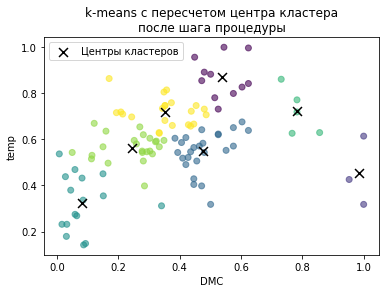

In [154]:
F = pd.DataFrame(columns=['F1', 'F2', 'F3'])
points = np.array([[data_DMC['DMC'][i], data_temp['temp'][i]] for i in range(105)])
center = points[np.random.permutation(105)[:k]]
f = 1
while True:
    F1, F2, F3 = 0, 0, 0
    C = pairwise_distances_argmin(points, center)
    new_center = np.array([points[C == i].mean(0) for i in range(k)])
    if np.all(center == new_center):
        break
    center = new_center
    for n in range(k):
        F1 += np.sum(np.linalg.norm(points[C == n] - center[n]) ** 2)
        for i in range(len(points[C == n])):
            for j in range(i, len(points[C == n])):
                F2 += np.linalg.norm(points[C == n][i] - points[C == n][j]) ** 2
        F3 += np.sum(np.std(points[C == n], axis=0))
    F.loc[f] = [F1,F2,F3]
    f += 1

plt.scatter(points[:, 0], points[:, 1], c = C, marker = 'o', alpha = 0.6)
plt.scatter(center[:, 0], center[:, 1], color = 'black', marker = 'x', s = 80, label = 'Центры кластеров')
plt.title("k-means с пересчетом центра кластера\nпосле шага процедуры")
plt.xlabel('DMC')
plt.ylabel('temp')
plt.legend()
plt.show()

#### Функционалы качества алгоритма k-means с пересчетом центра кластера после шага процедуры

In [155]:
F

,F1,F2,F3
1,2.159468,59.175867,1.128022
2,1.586101,34.310322,1.101945
3,1.341442,26.293789,1.055609
4,1.309316,25.058227,1.052607


В результате применения двух вариантов метода k-means получено два различных разбиения. Метод с пересчетом центра кластера после каждого изменения состава выполняет меньшее количество циклов. Функционалы качества на каждой итерации для обоих вариантов снижаются, функционалы метода с пересчетом центра кластера после шага процедуры на последней итерации имеют значения меньше чем при пересчете после каждого изменения состава.

## Выводы

В процессе выполнения лабораторной работы были изучены основные понятия и некоторые методы кластерного анализа, в частности k-means. Множество точек было нормализовано и отображено на графике, определено количество кластеров и реализованы два варианта метода k-means: с пересчетом центров кластеров после каждого изменения состава и после шага процедуры, полученные кластеры отображены на графиках. На каждом шаге процедуры вычислены функционалы качества $F_1, F_2, F_3$, на каждой итерации функционалы качества обоих алгоритмов уменьшаются. Метод с пересчетом центров кластеров после шага процедуры имеет большее количество циклов, но меньшие значения функционалов качества.